### Logistic Regression with R

#### Loading data

In [13]:
#importing Data
df = read.csv('kyphosis.csv')
head(df, 5)

Kyphosis,Age,Number,Start
absent,71,3,5
absent,158,3,14
present,128,4,5
absent,2,5,1
absent,1,4,15


In [14]:
colSums(is.na(df))

Kyphosis      Age   Number    Start 
       0        0        0        0

In [15]:
str(df)

'data.frame':	81 obs. of  4 variables:
 $ Kyphosis: Factor w/ 2 levels "absent","present": 1 1 2 1 1 1 1 1 1 2 ...
 $ Age     : int  71 158 128 2 1 1 61 37 113 59 ...
 $ Number  : int  3 3 4 5 4 2 2 3 2 6 ...
 $ Start   : int  5 14 5 1 15 16 17 16 16 12 ...


In [16]:
summary(df)

    Kyphosis       Age             Number           Start      
 absent :64   Min.   :  1.00   Min.   : 2.000   Min.   : 1.00  
 present:17   1st Qu.: 26.00   1st Qu.: 3.000   1st Qu.: 9.00  
              Median : 87.00   Median : 4.000   Median :13.00  
              Mean   : 83.65   Mean   : 4.049   Mean   :11.49  
              3rd Qu.:130.00   3rd Qu.: 5.000   3rd Qu.:16.00  
              Max.   :206.00   Max.   :10.000   Max.   :18.00  

In [17]:
# Changing kyphosis to 0 and 1
df[,1] <- ifelse(df[,1] == "absent", 0, 1)  # this means absent=0 else = 1
head(df,5)

Kyphosis,Age,Number,Start
0,71,3,5
0,158,3,14
1,128,4,5
0,2,5,1
0,1,4,15


#### Let’s analyze the distribution of each independent variable:


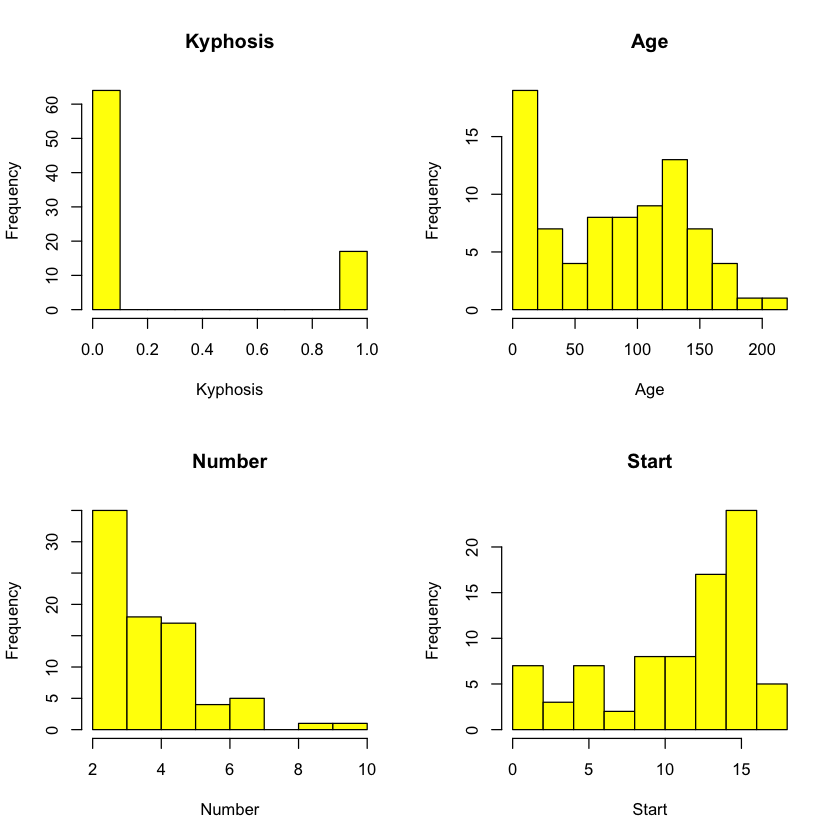

In [18]:
par(mfrow = c(2,2))
for( i in 1:4){
  hist(df[,i], main = colnames(df)[i], xlab = colnames(df)[i], col = 'yellow')
}

Implementation of Logistic Regression to predict the binary outcome — kyphosis in the dataset df.


In [23]:
library(mlbench)
library(MASS)
library(pROC)
library(dplyr)

In [27]:
logit_1 <- glm(Kyphosis~., family = binomial, data = df)
summary(logit_1)


Call:
glm(formula = Kyphosis ~ ., family = binomial, data = df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.3124  -0.5484  -0.3632  -0.1659   2.1613  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)   
(Intercept) -2.036934   1.449575  -1.405  0.15996   
Age          0.010930   0.006446   1.696  0.08996 . 
Number       0.410601   0.224861   1.826  0.06785 . 
Start       -0.206510   0.067699  -3.050  0.00229 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 83.234  on 80  degrees of freedom
Residual deviance: 61.380  on 77  degrees of freedom
AIC: 69.38

Number of Fisher Scoring iterations: 5


#### Variable Selection
The model ‘logit_1', might not be the best model with the given set of independent variables.

There are multiple methodologies for variable selection. In this article, we’ll explore only the ‘stepAIC’ function.

The ‘stepAIC’ function in R performs a stepwise model selection with an objective to minimize the AIC value.


In [28]:
logit_2 <- stepAIC(logit_1)
summary(logit_2)

Start:  AIC=69.38
Kyphosis ~ Age + Number + Start

         Df Deviance    AIC
<none>        61.380 69.380
- Age     1   64.536 70.536
- Number  1   65.299 71.299
- Start   1   71.627 77.627



Call:
glm(formula = Kyphosis ~ Age + Number + Start, family = binomial, 
    data = df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.3124  -0.5484  -0.3632  -0.1659   2.1613  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)   
(Intercept) -2.036934   1.449575  -1.405  0.15996   
Age          0.010930   0.006446   1.696  0.08996 . 
Number       0.410601   0.224861   1.826  0.06785 . 
Start       -0.206510   0.067699  -3.050  0.00229 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 83.234  on 80  degrees of freedom
Residual deviance: 61.380  on 77  degrees of freedom
AIC: 69.38

Number of Fisher Scoring iterations: 5


#### Analysis of the outcome
To analyze the predicted probability of having the value of “kyphosis” as “pos” we can use the summary function as below


In [29]:
summary(logit_2$fitted.values)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
0.008973 0.056280 0.121450 0.209876 0.319575 0.930991 

We can also analyze the distribution of predicted probability of 'presenting' kyphosis.


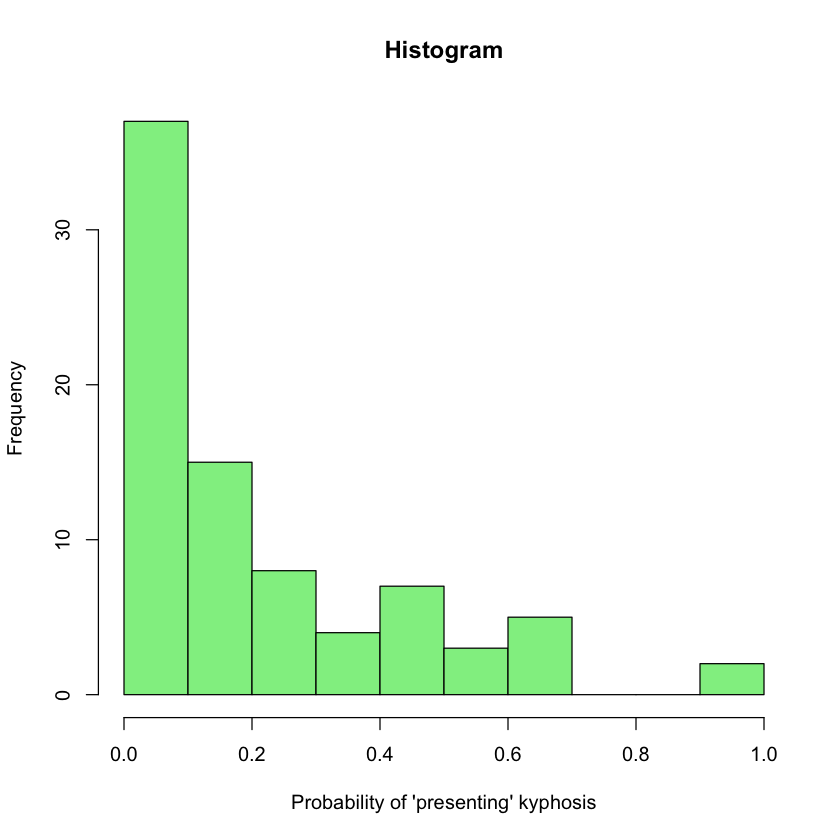

In [31]:
hist(logit_2$fitted.values, main = " Histogram ", 
     xlab = "Probability of 'presenting' kyphosis", col = 'light green')

Let’s now classify the prediction as “present” if the fitted value exceeds 0.5 otherwise “absent”.

In [33]:
df$Predict <- ifelse(logit_2$fitted.values >0.5,"present","absent")
df

Kyphosis,Age,Number,Start,Predict
0,71,3,5,absent
0,158,3,14,absent
1,128,4,5,absent
0,2,5,1,absent
0,1,4,15,absent
0,1,2,16,absent
0,61,2,17,absent
0,37,3,16,absent
0,113,2,16,absent
1,59,6,12,absent


#### Model Performance Evaluation
#### AIC
AIC stands for Akaike Information Criteria. It is analogous to adjusted R² and is the measure of fit which penalizes model for the number of independent variables. We always prefer a model with minimum AIC value.


In [34]:
logit_1$aic
logit_2$aic

[1] 69.37993

[1] 69.37993

#### Confusion Matrix
It is a tabular representation of Observed vs Predicted values. It helps to quantify the efficiency (or accuracy) of the model.

Let’s now compare the observed values of “kyphosis” with the predicted values:


In [40]:
confusionMatrix <- table(df$Kyphosis, df$Predict)
confusionMatrix

   
    absent present
  0     61       3
  1     10       7

In [41]:
efficiency <- sum(diag(confusionMatrix))/sum(confusionMatrix)
efficiency

[1] 0.8395062

From Confusion Matrix, the accuracy of our model is 84%.
#### ROC Curve
ROC stands for Receiver Operating Characteristic. It explains the model’s performance by evaluating Sensitivity vs Specificity.

Setting levels: control = 0, case = 1
Setting direction: controls < cases



Call:
roc.formula(formula = Kyphosis ~ logit_2$fitted.values, data = df,     plot = TRUE, main = "ROC CURVE", col = "blue")

Data: logit_2$fitted.values in 64 controls (Kyphosis 0) < 17 cases (Kyphosis 1).
Area under the curve: 0.8594

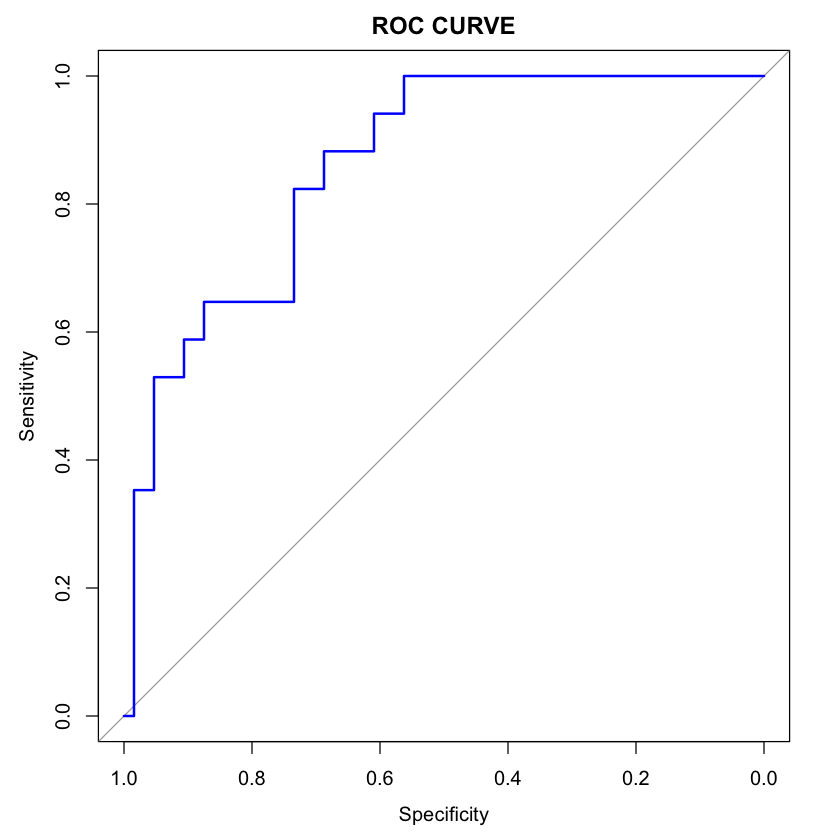

In [42]:
roc(Kyphosis~logit_2$fitted.values, data = df, plot = TRUE, 
    main = "ROC CURVE", col= "blue")

The area under the ROC Curve is an index of accuracy. Higher the area under the curve, better the prediction power of the model.

AUC of a perfect predictive model equals 1.


In [43]:
auc(Kyphosis~logit_2$fitted.values, data = df)

Setting levels: control = 0, case = 1
Setting direction: controls < cases


Area under the curve: 0.8594

The area under the curve of model ‘logit_2’ is 0.86.
